---

#  mplfinance: using lines for trends, support, resistance, and trading

---

### Sometimes it is convenient to draw straight lines ontop of an ohlc or candlestick chart, for example:
- Horizontal lines to mark levels of support and resistance
- Vertical lines to indicate the start or end of trading sessions, or to indicate the time or date when a trade took place.
- Trend lines to highlight a trend in the movement of prices.

#### `mpf.plot()` supports the drawing of straight lines on top of an ohlc or candlestick chart using one or more of the following four kwargs:

| keyword | argument value | action |
|:---|:---|:---|
| **`hlines`** | price, or sequence of prices | draw horizontal line(s) at a specified price level(s). |
| **`vlines`** | date[time], or sequence of date[time] | draw vertical line(s) at a specified date(s) or time(s). |
| **`alines`** | a sequence of two or more date/price pairs, or<br> a sequence of sequences of two or more date/price pairs | draw an arbitrary line by specifying two or more x,y pairs,<br>for example: (dateA,priceA),(dateB,priceB) to draw a line from point (dateA,priceA) to point (dateB,priceB).<br>this may be done for various reasons, including to highlight a trend or trends. |
| **`tlines`** | a list of one or more pairs of date[time]s | - calculate and draw a trend line between each date[time] in each date[time] pair<br>- value used at each date[time] may be open ,close, high, low,<br>&nbsp;&nbsp;&nbsp;or the average of any combination thereof<br>- trend line calculation method may be:<br>&nbsp;&nbsp;&nbsp;&nbsp;- a simple 'point-to-point' (from value at one date[time] to value at the other date[time]), or<br>  &nbsp;&nbsp;&nbsp;&nbsp;- linear 'least-squares' fit of all values from one date[time] through and including the other date[time]. |

---
In every case, the kwarg argument value may be either as specified in the above table<br>**OR the argument may be a dict** containing the above mentioned keyword and argument as specified above,<br> **plus** any or all of the following keywords to modify the line(s) being drawn:

- `colors`
- `linestyle`
- `linewidths`

For example, both of the following are valid specifications for `hlines`:
- `hlines=(123.0,128.0)`
- `hlines=dict( hlines=(123.0,128.0),colors=['r','g','b'],linestyle='dotted',linewidths=(3,4) )`

---

### See below for specific example usage of each of the kwargs:<br>&nbsp;&nbsp;`hlines`, `vlines`, `alines`, and `tlines`

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd

### Read in daily data for the S&P 500 from November of 2019 

In [3]:
daily = pd.read_csv('data/SP500_NOV2019_Hist.csv',index_col=0,parse_dates=True)
daily.index.name = 'Date'
daily.shape
daily.head(2)
daily.tail(2)

(20, 5)

,Open,High,Low,Close,Volume
Date,,,,,
2019-11-01,3050.72,3066.95,3050.72,3066.91,510301237
2019-11-04,3078.96,3085.20,3074.87,3078.27,524848878


,Open,High,Low,Close,Volume
Date,,,,,
2019-11-27,3145.49,3154.26,3143.41,3153.63,421853938
2019-11-29,3147.18,3150.30,3139.34,3140.98,286602291


In [4]:
import mplfinance as mpf

**Plot two horizontal lines to show support and resistance:**

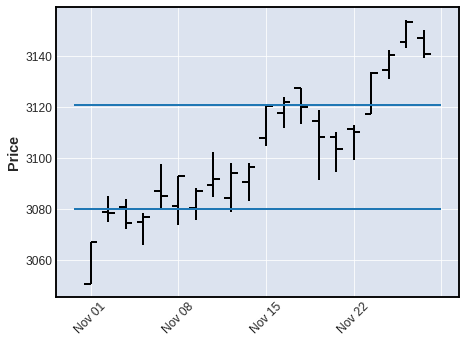

In [5]:
mpf.plot(daily,hlines=[3080,3121])

---

**color the lines, and modify the line style:**

(works with candlesticks too)

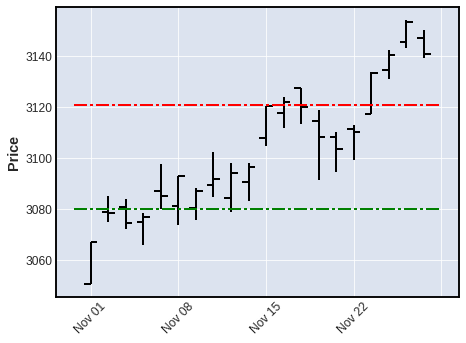

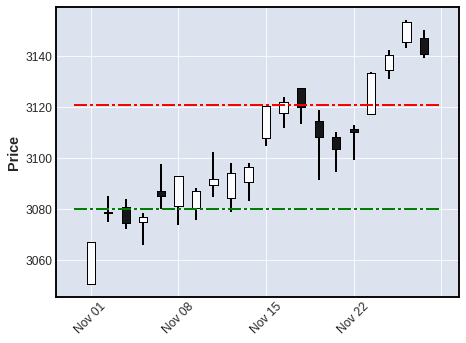

In [6]:
mpf.plot(daily,hlines=dict(hlines=[3080,3121],colors=['g','r'],linestyle='-.'))
mpf.plot(daily,hlines=dict(hlines=[3080,3121],colors=['g','r'],linestyle='-.'),type='candle')

---

**Use vertical lines to show days on which I made a trade:**

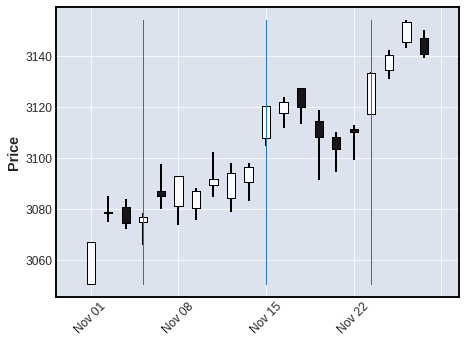

In [7]:
mpf.plot(daily,type='candle',vlines=dict(vlines=['2019-11-06','2019-11-15','2019-11-25'],linewidths=1))

---

**Using vertical lines to show the start of each trading day for intraday data:**

In [8]:
idf = pd.read_csv('./data/SP500_NOV2019_IDay.csv',index_col=0,parse_dates=True)
idf.shape
idf.head(2)
idf.tail(2)

(1563, 5)

,Open,Close,High,Low,Volume
Date,,,,,
2019-11-05 09:30:00,3080.80,3080.49,3081.47,3080.30,0
2019-11-05 09:31:00,3080.33,3079.36,3080.33,3079.15,0


,Open,Close,High,Low,Volume
Date,,,,,
2019-11-08 15:58:00,3090.73,3091.04,3091.13,3090.58,0
2019-11-08 15:59:00,3091.16,3092.91,3092.91,3090.96,0


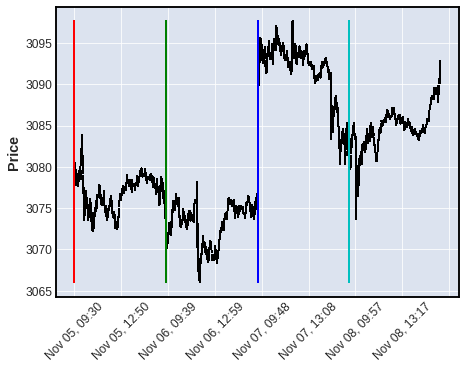

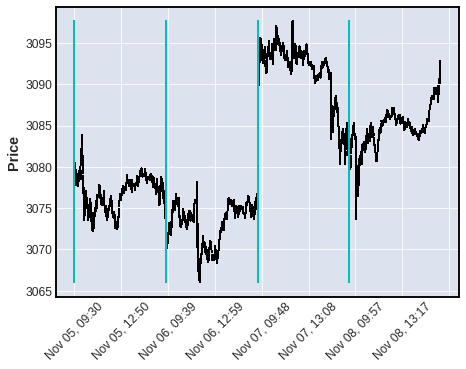

In [9]:
vls=['2019-11-05 09:30',
     '2019-11-06 09:30',
     '2019-11-07 09:30',
     '2019-11-08 09:30']
mpf.plot(idf,vlines=dict(vlines=vls,colors=('r','g','b','c')))  # different color for each line
mpf.plot(idf,vlines=dict(vlines=vls,colors='c'))                # one color for all lines